In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
filepath = 'OPENDATA_BOOKING_CALL_A_BIKE.csv'
chunksize = 10 ** 6
date_after = pd.Timestamp('2013-12-31 23:59:59')
date_before = pd.Timestamp('2016-01-01 00:00:00')
dates_from_data = ['DATE_BOOKING','DATE_FROM', 'DATE_UNTIL']
needed_cols = ['DATE_BOOKING' , 'DATE_FROM', 'DATE_UNTIL', 'START_RENTAL_ZONE', 'END_RENTAL_ZONE', 'CITY_RENTAL_ZONE']

def load_csv():
    data_iterator = pd.read_csv(filepath, chunksize=chunksize, sep=';', parse_dates=dates_from_data, usecols=needed_cols)

    chunk_list = []  

    # Each chunk is in dataframe format
    # Load the data in chunks so that the memory doesn't get fully occupied.
    for data_chunk in data_iterator:  
        filtered_chunk = data_chunk[(data_chunk['CITY_RENTAL_ZONE'] == 'Hamburg') & (data_chunk['DATE_UNTIL'] < date_before)]
        chunk_list.append(filtered_chunk)
    
    filtered_data = pd.concat(chunk_list)
    
%time load_csv()

CPU times: user 1min 31s, sys: 11.8 s, total: 1min 43s
Wall time: 1min 44s


In [3]:
#TEMPERATURE DATA STATIONS FOR 'HAMBURG'
#00954 UFS Deutsche Bucht    -- geoBreite = 54.1796   geoLaenge = 7.4587 This is in the Nordsee and can't be used to the city hamburg
#01228 UFS TW Ems            -- geoBreite = 54.1651   geoLaenge = 6.3460 Same as above
#01975 Hamburg-Fühlsbüttel   -- geoBreite = 53.6332   geoLaenge = 9.9881
#01981 Hamburg-Neuwiedenthal -- geoBreite = 53.4777   geoLaenge = 9.8957
#06254 Hamburg-Lotsenhöft    -- not available
#13904 Nordseeboje 2         -- only till 2010

#TODO GET GOOGLE MAPS COORDINATES WITH PICTURES https://www.gpskoordinaten.de

In [4]:
filepath_temperature_dict = ['temperature_station_01975.csv', 'temperature_station_01981.csv']

#Read the .csv files from the stations 1975 and 1981
temperature_station_1975 = pd.read_csv(filepath_temperature_dict[0], sep=';', usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])
temperature_station_1981 = pd.read_csv(filepath_temperature_dict[1], sep=';', usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])

In [5]:
#Format the Dates from Object to DateTime Types
temperature_station_1975['MESS_DATUM'] = pd.to_datetime(temperature_station_1975['MESS_DATUM'], format='%Y%m%d%H')
temperature_station_1981['MESS_DATUM'] = pd.to_datetime(temperature_station_1981['MESS_DATUM'], format='%Y%m%d%H')


#Filter for the Data from 2014-2015
temperature_station_1975 = temperature_station_1975[(temperature_station_1975['MESS_DATUM'] > date_after) & (temperature_station_1975['MESS_DATUM'] < date_before)]
temperature_station_1981 = temperature_station_1981[(temperature_station_1981['MESS_DATUM'] > date_after) & (temperature_station_1981['MESS_DATUM'] < date_before)]

#Reset indices
temperature_station_1975.reset_index(drop=True, inplace=True)
temperature_station_1981.reset_index(drop=True, inplace=True)

#Check if we have all data from the two years (2 years * 365 days * 24 hours/day)
if len(temperature_station_1975) == (2 * 365 * 24):
    print('No data missing for station 1975!')
if len(temperature_station_1981) == (2 * 365 * 24):
    print('No data missing for station 1981!')

No data missing for station 1975!
No data missing for station 1981!


In [6]:
# Check for missing values
print('Absolute values missing for station 1975 are: ',temperature_station_1975['TT_TU'][temperature_station_1975['TT_TU'] == -999.0].count())
print('Absolute values missing for station 1981 are: ',temperature_station_1981['TT_TU'][temperature_station_1981['TT_TU'] == -999.0].count())

Absolute values missing for station 1975 are:  0
Absolute values missing for station 1981 are:  1


In [7]:
# Handle missing value by just using the other stations data at that exact time
index_of_missing_value = temperature_station_1981.index[temperature_station_1981['TT_TU'] ==-999.0]
temperature_station_1981.at[index_of_missing_value, 'TT_TU'] = temperature_station_1975.loc[index_of_missing_value].TT_TU

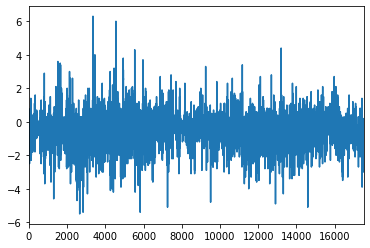

In [8]:
# Check how similar STATIONS 1975 and 1981 are
check_station_differences = temperature_station_1975['TT_TU'].subtract(temperature_station_1981['TT_TU'])

check_station_differences.plot()

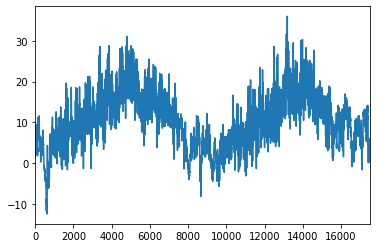

In [9]:
# The values are too far from each other in their maxima (>5 degrees)
# So we will complete the temperature data by taking the average of each station
temperature_data = pd.DataFrame({'DATE' : temperature_station_1975['MESS_DATUM'], 'TEMPERATURE': (temperature_station_1975['TT_TU']+temperature_station_1975['TT_TU'])/2})

temperature_data['TEMPERATURE'].plot()

In [10]:
#Preciptation Data
#Stations 1975 and 1981
filepath_precipitation_dict = ['precipitation_station_01975.csv','precipitation_station_01981.csv']

#Read the .csv files from the stations 1975 and 1981
precipitation_station_1975 = pd.read_csv(filepath_precipitation_dict[0], sep=';', usecols=[0,1,3])
precipitation_station_1981 = pd.read_csv(filepath_precipitation_dict[1], sep=';', usecols=[0,1,3])

In [11]:
#Format the Dates from Object to DateTime Types
precipitation_station_1975['MESS_DATUM'] = pd.to_datetime(precipitation_station_1975['MESS_DATUM'], format='%Y%m%d%H')
precipitation_station_1981['MESS_DATUM'] = pd.to_datetime(precipitation_station_1981['MESS_DATUM'], format='%Y%m%d%H')

In [12]:
#Filter for the Data from 2014-2015
precipitation_station_1975 = precipitation_station_1975[(precipitation_station_1975['MESS_DATUM'] > date_after) & (precipitation_station_1975['MESS_DATUM'] < date_before)]
precipitation_station_1981 = precipitation_station_1981[(precipitation_station_1981['MESS_DATUM'] > date_after) & (precipitation_station_1981['MESS_DATUM'] < date_before)]

#Reset indices
precipitation_station_1975.reset_index(drop=True, inplace=True)
precipitation_station_1981.reset_index(drop=True, inplace=True)

In [13]:
# Check for missing values
print('Absolute values missing for station 1975 are: ',precipitation_station_1975['  R1'][precipitation_station_1975['  R1'] == -999.0].count())
print('Absolute values missing for station 1981 are: ',precipitation_station_1981['  R1'][precipitation_station_1981['  R1'] == -999.0].count())

Absolute values missing for station 1975 are:  20
Absolute values missing for station 1981 are:  0


In [14]:
# Handle missing value by just using the other stations data at that exact time
index_of_missing_value = precipitation_station_1975.index[precipitation_station_1975['  R1'] ==-999.0]
precipitation_station_1975.at[index_of_missing_value, '  R1'] = precipitation_station_1981.loc[index_of_missing_value]['  R1']

In [15]:
print(len(precipitation_station_1975),len(precipitation_station_1981))

17515 17512


In [17]:
precipitation_merge = pd.merge(precipitation_station_1975, precipitation_station_1981, on='MESS_DATUM')

In [18]:
precipitation_data = pd.DataFrame({'DATE' : precipitation_merge['MESS_DATUM'], 'PRECIPITATION' : (precipitation_merge['  R1_x']+precipitation_merge['  R1_y'])/2})

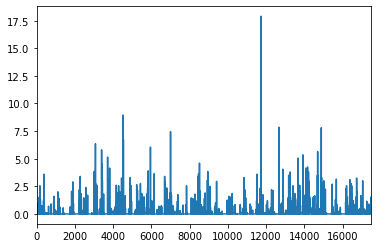

In [19]:
precipitation_data['PRECIPITATION'].plot()